In [20]:
cd /home/benoit/programmation/science/control

In [180]:
params.drag


ans = 

  struct with fields:

       coeff: 0.3000
    ref_area: 29.6088



In [204]:
clear Traj Defs;
clear RocketPhys Traj;
params = Defs.ssSRBDef();
params.drag.coeff = 0.5;
params.thrust_mul = 1;
solparams.endtime = 120;
solparams.altmindist = params.kEarthRadius + 50;
solparams.mindist = params.kEarthRadius + 150;
solparams.maxdist = params.kEarthRadius + 2000;
solparams.def = params;
traj0 = Traj.FindInit(solparams);
ev = traj0.states(:,end);
ev
[a,b] =Traj.Endfunc(ev, solparams)
Traj.ObjFunc1(ev, solparams)
norm(traj0.states(1:2,end)) - params.kEarthRadius


ev =

   1.0e+03 *

   -0.1439
    6.4823
   -0.0030
    0.0016


a =

   1.0e+03 *

   -0.1349
   -1.7151
   -0.0629


b =

     []


ans =

   55.6472


ans =

  112.8881




ans =

  113.0482



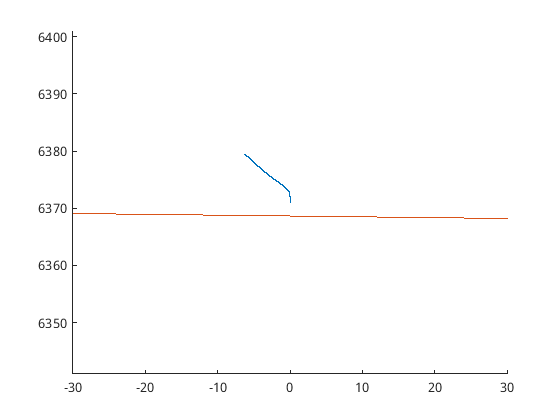

In [196]:
clear Traj;
hold off

hold on;
Traj.PlotIt(params, traj0.tl, traj0.states);
%Traj.PlotIt(params, res.soln.grid.time, res.soln.grid.state);
angles = linspace(0, 2*pi, 100);
xlim([-30 30])
ylim(params.kEarthRadius + [-30 30])
plot(cos(angles)*params.kEarthRadius, sin(angles)*params.kEarthRadius);
hold off;

In [163]:
clear Traj;
clear RocketPhys Defs;
res = Traj.Test2(solparams, traj0)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running OptimTraj, iteration 1
  -> Transcription via 4th-order Runge-Kutta method 
        nSegments = 20 
        nSubSteps = 5 
                                            First-order      Norm of
 Iter F-count            f(x)  Feasibility   optimality         step
    0     288    4.708839e+01    2.698e+00    2.854e-02
    1     579    4.720625e+01    2.617e+00    9.230e-02    2.415e+00
    2     870    4.736137e+01    2.510e+00    2.147e-01    3.248e+00
    3    1162    4.760573e+01    2.340e+00    2.130e-02    5.242e+00
    4    1453    4.768154e+01    2.291e+00    5.865e-02    1.636e+00
    5    1745    4.779809e+01    2.212e+00    1.994e-02    2.660e+00
    6    2036    4.794091e+01    2.108e+00    8.928e-02    3.544e+00
    7    2329    4.802985e+01    2.039e+00    1.927e-02    2.434e+00
    8    2623    4.811189e+01    1.969e+00    1.923e-02    2.501e+00
    9    2913    4.818714e+01    1.900e+00    8.657e-02    2.503

  107   31243    4.320624e+01    7.632e-03    9.231e-02    5.544e+00
  108   31531    4.315616e+01    8.121e-03    1.061e-01    2.857e+00
  109   31819    4.315931e+01    1.540e-03    7.421e-02    6.889e-01
  110   32108    4.305003e+01    1.464e-03    4.326e-02    7.181e+00
  111   32396    4.299602e+01    1.559e-03    3.899e-02    3.084e+00
  112   32685    4.287448e+01    1.029e-01    3.911e-02    6.595e+00
  113   32973    4.274813e+01    2.581e-01    4.257e-02    7.327e+00
  114   33261    4.262401e+01    3.766e-01    7.823e-02    7.235e+00
  115   33550    4.250038e+01    4.620e-01    1.139e-01    7.178e+00
  116   33838    4.239066e+01    5.115e-01    7.583e-02    6.814e+00
  117   34126    4.223352e+01    4.968e-01    7.584e-02    1.037e+01
  118   34414    4.209845e+01    6.626e-02    8.233e-02    1.000e+01
  119   34702    4.208402e+01    7.522e-03    7.586e-02    1.813e+00
  120   34992    4.199900e+01    6.886e-03    7.585e-02    3.983e+00

                                 

  217   63258    3.794284e+01    1.834e-05    7.282e-03    4.016e-01
  218   63551    3.793899e+01    9.826e-06    7.266e-03    8.155e-01
  219   63848    3.793278e+01    3.793e-05    7.708e-03    1.437e+00
  220   64141    3.791605e+01    6.793e-05    9.507e-03    2.887e+00
  221   64434    3.788804e+01    5.791e-04    2.213e-02    5.803e+00
  222   64733    3.786371e+01    6.555e-04    1.562e-02    7.745e-01
  223   65024    3.786150e+01    6.555e-04    1.562e-02    4.205e-01
  224   65318    3.786471e+01    4.015e-04    1.039e-02    3.829e-01
  225   65608    3.786249e+01    4.016e-04    1.039e-02    4.205e-01
  226   65902    3.786761e+01    2.273e-04    5.382e-03    1.973e-01
  227   66192    3.786649e+01    2.273e-04    5.410e-03    2.103e-01
  228   66486    3.787021e+01    1.293e-04    5.142e-03    9.976e-02
  229   66777    3.786920e+01    1.293e-04    5.154e-03    1.840e-01
  230   67069    3.787092e+01    3.297e-05    5.972e-03    3.392e-01
  231   67360    3.786992e+01    3

In [88]:
%ev = res.states(:,end);
ev = res.soln.grid.state(:,end);
ev
an = Traj.AnalyseEll(ev(1:2), ev(3:4), params.kGM)
an.a * (1+an.e)-params.kEarthRadius
ev
Traj.EllGetSpeed(an, an.a*(1-an.e))


ev =

   1.0e+03 *

   -0.1536
    6.4156
   -0.0026
    0.0009


an = 

  struct with fields:

     u: -58.3133
     a: 3.4177e+03
     h: 1.6581e+04
     e: 0.8934
    gm: 3.9859e+05


ans =

  100.0000


ev =

   1.0e+03 *

   -0.1536
    6.4156
   -0.0026
    0.0009


ans =

   45.5145



In [83]:
res.controls(:,end-10:end)

123

ans =

  Columns 1 through 6

  -3.064102568237964  -3.058425241472717  -3.055145053825479  -3.046421779828773  -3.046174457762055  -3.035024607426230
   1.000000000000000   1.000000000000000   1.000000000000000   1.000000000000000   1.000000000000000   1.000000000000000

  Columns 7 through 11

  -3.022315736514921  -3.022022184103882  -3.020799481961534  -3.018502672621108  -3.016549796788021
   1.000000000000000   1.000000000000000   1.000000000000000   1.000000000000000   1.000000000000000



In [19]:
clear Traj;


123
